# Практика

In [1]:
import pandas as pd
import numpy as np

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
df = pd.DataFrame(np.random.choice(['герб', 'решка'], (1000000, 2)), columns=['coin1', 'coin2'])
difSides = len(df[df.coin1 != df.coin2]) / len(df)
print('Вероятность того, что монеты выпали разными сторонами составляет', difSides)

Вероятность того, что монеты выпали разными сторонами составляет 0.500278


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [3]:
df = pd.DataFrame(np.random.choice(['герб', 'решка'], (1000000, 3)), columns=['coin1', 'coin2', 'coin3'])
cases = set(df.coin1 + ' | ' + df.coin2 + ' | ' + df.coin3)

print('Множество элементарных событий:')
cases

Множество элементарных событий:


{'герб | герб | герб',
 'герб | герб | решка',
 'герб | решка | герб',
 'герб | решка | решка',
 'решка | герб | герб',
 'решка | герб | решка',
 'решка | решка | герб',
 'решка | решка | решка'}

In [4]:
noHeads = len(df[(df.coin1 == 'решка') & (df.coin2 == 'решка') & (df.coin3 == 'решка')]) / len(df)
evenHeads = df.isin(['герб']).sum(axis=1).isin([2]).sum() / len(df)
thirdHeads = df.coin3.value_counts().loc['герб'] / len(df)

print('P(A) =', noHeads)
print('P(B) =', evenHeads)
print('P(C) =', thirdHeads)

P(A) = 0.124297
P(B) = 0.376134
P(C) = 0.500187


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [5]:
df = pd.DataFrame(np.random.choice(['L', 'E', 'declined'], (1000000, 3)), columns=['member_1', 'member_2', 'member_3'])

In [6]:
choice_L = len(df[df.isin(['L']).sum(axis=1) >= 2]) / len(df)
choice_E = len(df[df.isin(['E']).sum(axis=1) >= 2]) / len(df)

print('P(A) =', choice_L)
print('P(B) =', choice_E)

P(A) = 0.25969
P(B) = 0.258916


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [7]:
df = pd.DataFrame(np.random.choice(np.arange(1, 7), (1000000, 2)), columns=['cube1', 'cube2'])

In [8]:
doubleSix = (df.isin([6]).sum(axis=1) == 2).sum() / len(df)
aboveTen = len(df[df.cube1 + df.cube2 > 10]) / len(df)
noSix = (df.isin([6]).sum(axis=1) == 0).sum() / len(df)
print('P(A) =', doubleSix)
print('P(B) =', aboveTen)
print('P(C) =', noSix)

P(A) = 0.027823
P(B) = 0.083596
P(C) = 0.693524


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [9]:
df = pd.DataFrame(np.random.choice(np.arange(1, 7), (1000000, 2)), columns=['cube1', 'cube2'])

In [10]:
haveSix = (df.isin([6]).sum(axis=1) > 0).sum() / len(df)
print('P(D) =', haveSix)

P(D) = 0.304885


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [11]:
df = pd.DataFrame(np.random.choice(np.arange(0, 10), (1000000, 3)), columns=['num1', 'num2', 'num3'])

In [12]:
A = len(df[(df.num1 != df.num2) & (df.num1 != df.num3) & (df.num2 != df.num3)]) / len(df)
B = len(df[(df.num1 == df.num2) & (df.num1 == df.num3)]) / len(df)
C = len(df[(df.num1 == df.num2) | (df.num1 == df.num3) | (df.num2 == df.num3)]) / len(df)
D = len(df[(df.num1 != df.num2) | (df.num1 != df.num3) | (df.num2 != df.num3)]) / len(df)

print('P(A) =', A)
print('P(B) =', B)
print('P(C) =', C)
print('P(D) =', D)

P(A) = 0.720838
P(B) = 0.009959
P(C) = 0.279162
P(D) = 0.990041


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [13]:
# У первого игрока, вытаскивающего билет, чистый выигрыш или -1 или +9, если правильно условие понял.  Распределение Бернулли.
df = pd.DataFrame(np.random.choice([0, 10], (1000000, 1), p=[0.9, 0.1]), columns=['result'])

In [14]:
df['net_win'] = df.result - 1
df['net_win'].value_counts().sort_index() / len(df)

-1    0.899666
 9    0.100334
Name: net_win, dtype: float64

<AxesSubplot:>

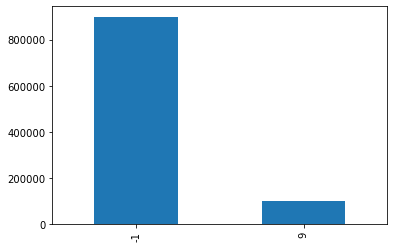

In [15]:
df['net_win'].value_counts().plot(kind='bar')

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [16]:
df = pd.DataFrame(np.random.choice(np.arange(1, 7), (1000000, 2)), columns=['cube1', 'cube2'])
df['overall'] = df.cube1 + df.cube2

In [17]:
df['overall'].value_counts().sort_index() / len(df)

2     0.027904
3     0.055545
4     0.083400
5     0.110706
6     0.138914
7     0.166064
8     0.139207
9     0.111075
10    0.083795
11    0.055667
12    0.027723
Name: overall, dtype: float64

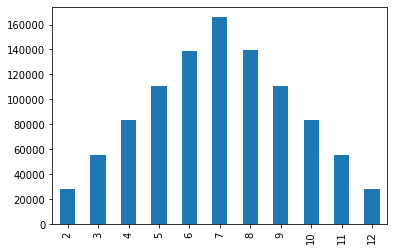

In [18]:
plt = df['overall'].value_counts().sort_index().plot(kind='bar')

<AxesSubplot:title={'center':'Функция распределения'}>

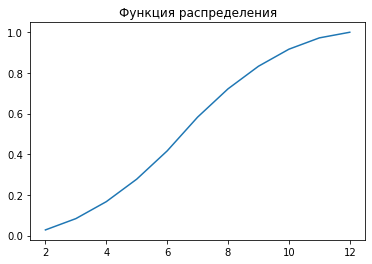

In [19]:
(df['overall'].value_counts().sort_index() / len(df)).expanding().sum().plot(title='Функция распределения')

In [20]:
print('Вероятность суммы <= 4:')
(df['overall'] <= 4).sum() / len(df)

Вероятность суммы <= 4:


0.166849

In [21]:
print('Вероятность суммы > 4:')
(df['overall'] > 4).sum() / len(df)

Вероятность суммы > 4:


0.833151

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [22]:
card_values = ['6','7', '8', '9', '10', 'J', 'Q', 'K', 'A']
card_suits = ['h', 'd', 'c', 's']
card_deck = []
for i in card_values * len(card_suits):
    card_deck.append(i + card_suits[len(card_deck) // len(card_values)])

In [23]:
# составляем возможные сочетания по 2 карты с учётом порядка появления.
# пробовал сразу создавать dataframe такой командой:
# pd.DataFrame([np.random.choice(card_deck, (1, 2), replace=False) for i in range(1000000)], columns=['cards']),
# но такой код отрабатывал существенно медленнее, чем через создание отдельного списка с сочетаниями карт
combinations = []
for i in card_deck:
    for j in card_deck:
        if i != j:
            combinations.append(i + j)

In [24]:
df = pd.DataFrame(np.random.choice(combinations, (1000000, 1)), columns=['cards'])
df = pd.DataFrame(list(zip(map(lambda x: x[:2], df.cards.values), map(lambda x: x[2:], df.cards.values))),\
                   columns=['card1', 'card2'])

In [25]:
A = len(df[(df.card1.isin(['6h', '6d', '6c', '6s'])) & (df.card2.isin(['7h', '7d', '7c', '7s']))]) / len(df)
B = len(df[(df.card1 == '6d') & (df.card2 == '7d')]) / len(df)

print('Вероятность 1-й шестёрки, 2-й семерки:', A)
print('Вероятность 1-й шестёрки бубей, 2-й семерки бубей:', B)

Вероятность 1-й шестёрки, 2-й семерки: 0.012592
Вероятность 1-й шестёрки бубей, 2-й семерки бубей: 0.000765


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [26]:
# создаём dataframe и заполняем первый столбец - результаты извлечения первого шара
df = pd.DataFrame(np.random.choice(['white', 'black'], (1000000, 1), p=[2/5, 3/5]), columns=['first'])

In [27]:
# добавляем столбец с результатами извелечения второго шара
df['second'] = None
df.loc[df['first'] == 'black', ['second']] = np.random.choice(['white', 'black'], \
                                                              (len(df[df['first'] == 'black']), 1), p=[3/5, 2/5])
df.loc[df['first'] == 'white', ['second']] = np.random.choice(['white', 'black'], \
                                                              (len(df[df['first'] == 'white']), 1), p=[1/4, 3/4])

In [28]:
twoWhite = len(df[(df['first'] == 'white') & (df['second'] == 'white')]) / len(df)
twoBlack = len(df[(df['first'] == 'black') & (df['second'] == 'black')]) / len(df)

print('P(A) =', twoWhite)
print('P(B) =', twoBlack)

P(A) = 0.099977
P(B) = 0.240675
